
AQI Dataset Overview:
          AQI Value
count  16169.000000
mean      61.924794
std       48.703700
min        1.000000
25%       29.000000
50%       52.000000
75%       81.000000
max      963.000000

WQI Dataset Overview:
       Temperature  Dissolved Oxygen          pH  \
count   295.000000        295.000000  295.000000   
mean     20.903898          7.342034    7.754627   
std       6.051566          1.910113    0.378879   
min       0.000000          0.000000    5.350000   
25%      18.000000          6.850000    7.550000   
50%      22.500000          7.750000    7.750000   
75%      25.550000          8.600000    8.000000   
max      30.500000         10.250000    8.600000   

       Bio-Chemical Oxygen Demand (mg/L)  Faecal Streptococci (MPN/ 100 mL)  \
count                         295.000000                         295.000000   
mean                            3.544136                        7463.333729   
std                             9.043299                       26272

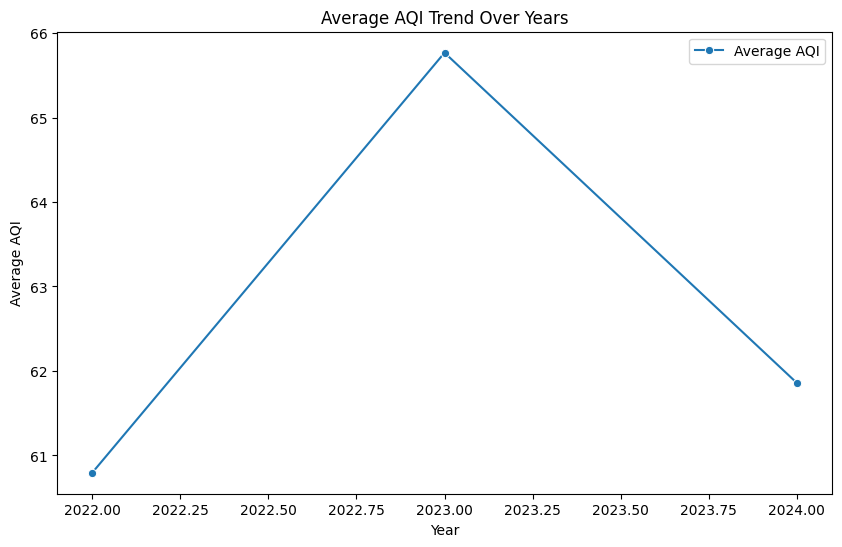

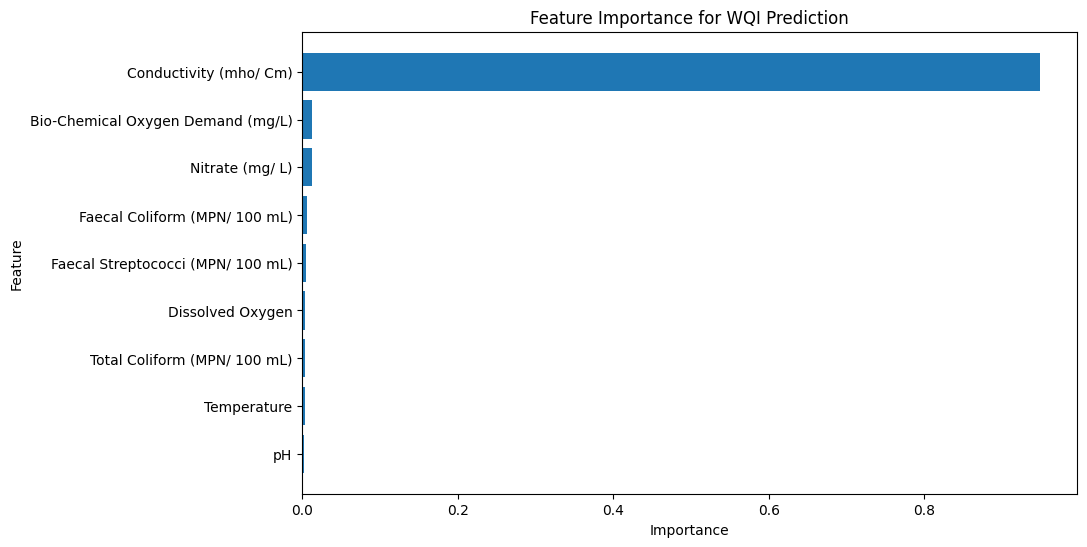

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
aqi_data = pd.read_csv("/content/AQI.csv")
wqi_data = pd.read_csv("/content/WQI.csv")

# Display dataset statistics
print("\nAQI Dataset Overview:")
print(aqi_data.describe())
print("\nWQI Dataset Overview:")
print(wqi_data.describe())

# Preprocess AQI Data
aqi_data["Date"] = pd.to_datetime(aqi_data["Date"])
aqi_data["Year"] = aqi_data["Date"].dt.year
aqi_data_grouped = aqi_data.groupby("Year")["AQI Value"].mean().reset_index()

# Preprocess WQI Data
X_wqi = wqi_data.drop("WQI", axis=1)
y_wqi = wqi_data["WQI"]

# Split WQI Data
X_train, X_test, y_train, y_test = train_test_split(X_wqi, y_wqi, test_size=0.2, random_state=42)

# Train Random Forest Model for WQI Prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf_model.predict(X_test)
print("\nWQI Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Plot AQI Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=aqi_data_grouped, x="Year", y="AQI Value", marker="o", label="Average AQI")
plt.title("Average AQI Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.legend()
plt.show()

# Feature Importance for WQI
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()
features = X_wqi.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances[sorted_idx])
plt.title("Feature Importance for WQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
